# Bootstrapping

*SG2227 Saleh Rezaeiravesh and Philipp Schlatter*

The idea of bootstrapping is to create a "self-starting" algorithm, i.e. to create a sample distribution based on just one sample. The method is related to the "leave-one-out" and the "jackknife"-methods.


In [57]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from scipy import special
from scipy import stats
from scipy.stats import chi2
from scipy.stats import t,norm

π = mt.pi

In [58]:
# create the random variables
mu, sigma = 5, 2 # mean and standard deviation

N=5000
s = np.random.normal(mu, sigma, N)
#s = mu+np.sqrt(12)*sigma*(np.random.random_sample((N,))-0.5)

In [59]:
np.mean(s),np.std(s)

(4.994065284535031, 2.0122253076228964)

In [60]:
# resampling with replacement
B=5000
bs = np.zeros(B)
for i in range(B):
    ii = np.random.randint(N, size=N)
    ss = s[ii]
    bs[i] = np.mean(ss)
    #bs[i] = np.mean(ss**2)-np.mean(ss)**2

<IPython.core.display.Javascript object>


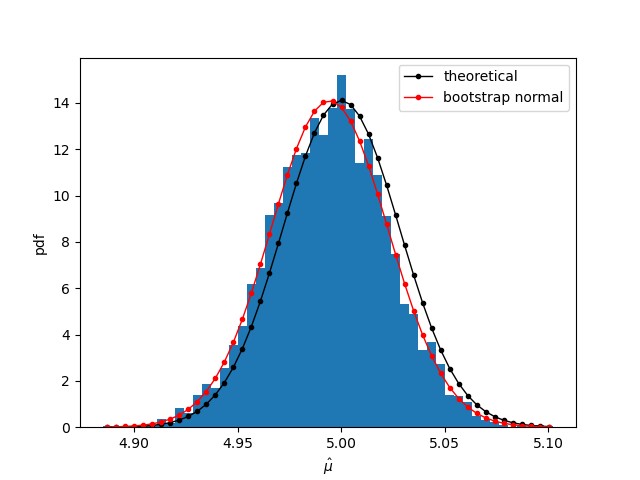

('Mean, variance, CI',
 4.994330324805485,
 0.0008005996908793311,
 0.05545794598145552)

In [61]:
nbins = 50  # number of bins

plt.figure()
count, bins, ignored = plt.hist(bs, nbins, density=True)

bc = (bins[0:-1]+bins[1:])/2   # bin centres
db = bins[1]-bins[0]           # bin size (assuming constant)

plt.plot(bc, norm.pdf(bc,mu,sigma/np.sqrt(N)), '.-',linewidth=1, color='k',label='theoretical')
plt.plot(bc, norm.pdf(bc,np.mean(bs),np.std(bs)), '.-',linewidth=1, color='r',label='bootstrap normal')
plt.xlabel('$\hat{\mu}$');plt.ylabel('pdf')
plt.legend()
plt.show()

'Mean, variance, CI',np.mean(bs),np.var(bs),1.96*np.std(bs)

In [62]:
print('Mean μ=%8.6f +/- %8.6f ' % (np.mean(bs),np.std(bs)*1.96))

Mean μ=4.994330 +/- 0.055458 


## What about the variance?


Two examples:
1. normally distributed variable
2. uniform distributed variable ($\mu=0.5$ and $\sigma=2$, $N=3000$, $M=10000$)

<IPython.core.display.Javascript object>


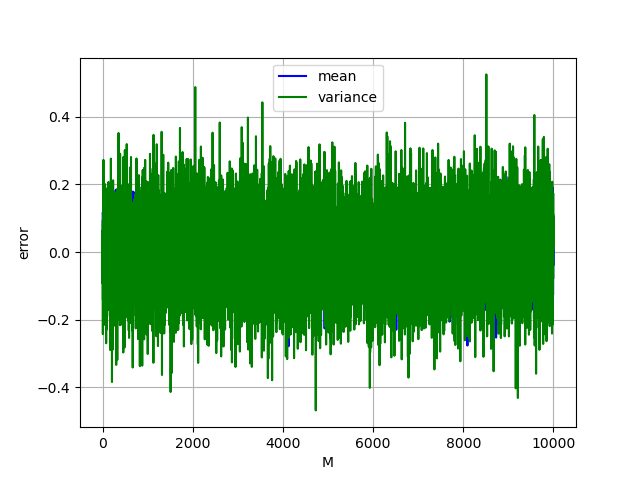

In [71]:
N = 1000
M = 10000
mm = np.zeros(M)
vv = np.zeros(M)

# population mean and variance
μ,σ = 5,2

# compute sample mean and variance
for i in range(M):
    ss = μ+np.sqrt(12)*σ*(np.random.random_sample((N,))-0.5)
    #ss = np.random.normal(μ, σ, N)

    mm[i] = np.mean(ss)
    vv[i] = np.var(ss,ddof=1)
    
plt.figure()
plt.plot(mm-μ,'b',label='mean')
plt.plot(vv-σ**2,'g',label='variance')

plt.grid('on')
plt.xlabel('M');plt.ylabel('error')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


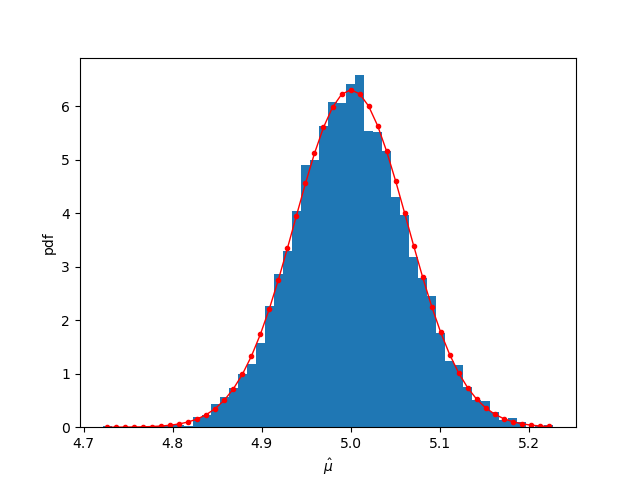

('Mean, variance, CI',
 4.999949496334239,
 0.004078403115713098,
 0.12517025768657442)

In [72]:
nbins = 50  # number of bins

plt.figure()
count, bins, ignored = plt.hist(mm, nbins, density=True)

bc = (bins[0:-1]+bins[1:])/2   # bin centres
db = bins[1]-bins[0]           # bin size (assuming constant)

plt.plot(bc, norm.pdf(bc,μ,σ/np.sqrt(N)), '.-',linewidth=1, color='r')
plt.xlabel('$\hat{\mu}$');plt.ylabel('pdf')
plt.show()

'Mean, variance, CI',np.mean(mm),np.var(mm),1.96*np.std(mm)

<IPython.core.display.Javascript object>


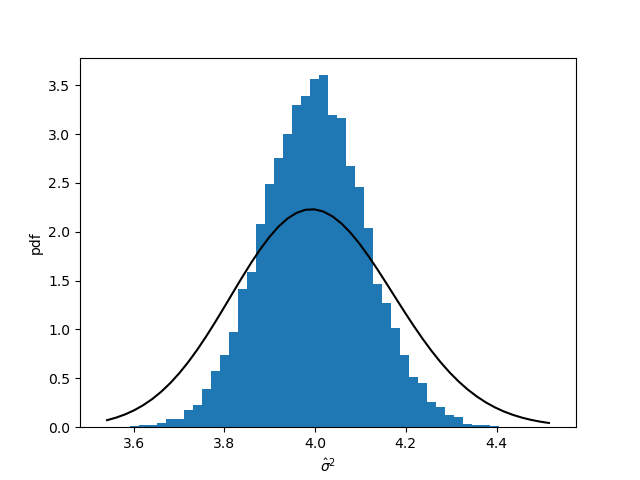

('Mean and variance', 3.9986888320492944, 0.012977706158247074)

In [83]:
nbins = 50  # number of bins

plt.figure()
count1, bins, ignored = plt.hist(vv, nbins, density=True)

bc1 = (bins[0:-1]+bins[1:])/2   # bin centres
db = bins[1]-bins[0]           # bin size (assuming constant)

fact = (σ**2/(N-1))
plt.plot(bc1, chi2.pdf(bc1/fact, N-1)/fact,'k-')
plt.xlabel('$\hat{\sigma}^2$');plt.ylabel('pdf')
plt.show()
'Mean and variance',np.mean(vv),np.var(vv)

In [84]:
B=10000
bs = np.zeros(B)
for i in range(B):
    ii = np.random.randint(N, size=N)
    sss = ss[ii]
    bs[i] = np.var(sss,ddof=1)

<IPython.core.display.Javascript object>


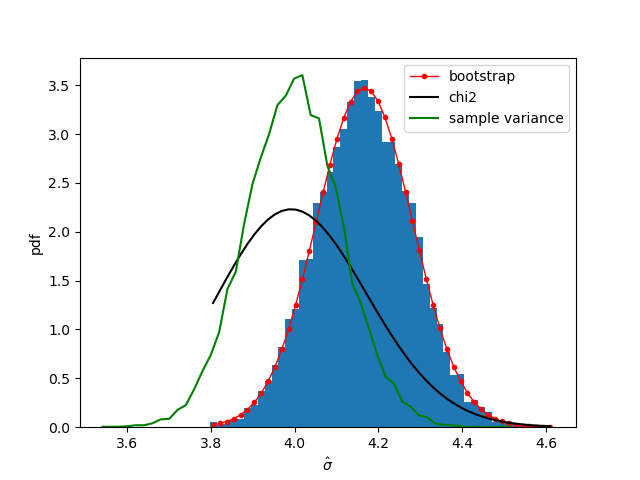

('Mean, variance, CI',
 4.166695852531915,
 0.013195447387818643,
 0.22514801950060342)

In [85]:
nbins = 50  # number of bins

plt.figure()
count, bins, ignored = plt.hist(bs, nbins, density=True)

bc = (bins[0:-1]+bins[1:])/2   # bin centres
db = bins[1]-bins[0]           # bin size (assuming constant)

plt.plot(bc, norm.pdf(bc,np.mean(bs),np.std(bs)), '.-',linewidth=1, color='r',label='bootstrap')
plt.xlabel('$\hat{\sigma}$');plt.ylabel('pdf')

fact = (σ**2/(N-1))
plt.plot(bc, chi2.pdf(bc/fact, N-1)/fact,'k-',label='chi2')
plt.plot(bc1,count1,'g',label='sample variance')

plt.legend()
plt.show()

'Mean, variance, CI',np.mean(bs),np.var(bs),1.96*np.std(bs)

In [86]:
print('Mean σ=%8.6f +/- %8.6f ' % (np.mean(bs),np.std(bs)*1.96))

Mean σ=4.166696 +/- 0.225148 


In [87]:
np.mean(bs)-np.std(bs)*1.96,np.mean(bs)+np.std(bs)*1.96

(3.941547833031312, 4.391843872032519)

In [88]:
confidence=0.95
np.percentile(bs,[100*(1-confidence)/2,100*(1-(1-confidence)/2)]) 

array([3.94505212, 4.39248444])